In [2]:
import pandas as pd

# Загрузим датасет
dataset_path = dataset_path = 'C:/Users/Aidyn/Desktop/repos/us_car_data.csv'
df = pd.read_csv(dataset_path)

# Выведем первые несколько строк для ознакомления с данными
df.head()


,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,CAFV,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Longitude,latitude
0,Thurston,Tumwater,WA,98512,2019,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,220,0,22,242565116,PUGET SOUND ENERGY INC,53067010910,-122.913102,47.013593
1,Island,Clinton,WA,98236,2022,NISSAN,LEAF,Battery Electric Vehicle,Eligibility unknown as battery range has not b...,0,0,10,183272785,PUGET SOUND ENERGY INC,53029972000,-122.359364,47.979655
2,Snohomish,Snohomish,WA,98290,2020,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,266,0,44,112552366,PUGET SOUND ENERGY INC,53061052502,-122.091505,47.915555
3,King,Seattle,WA,98134,2020,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,322,0,11,6336319,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033009300,-122.329815,47.579810
4,Snohomish,Edmonds,WA,98020,2013,TESLA,MODEL S,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,208,69900,21,186212960,PUGET SOUND ENERGY INC,53061050403,-122.375070,47.808070


In [3]:
# Изучение пропущенных значений
missing_values = df.isnull().sum()

# Вывод информации о пропущенных значениях
print("Пропущенные значения в каждом столбце:")
print(missing_values)


 

Пропущенные значения в каждом столбце:
County                   0
City                     0
State                    0
Postal Code              0
Model Year               0
Make                     0
Model                    0
Electric Vehicle Type    0
CAFV                     0
Electric Range           0
Base MSRP                0
Legislative District     0
DOL Vehicle ID           0
Electric Utility         0
2020 Census Tract        0
Longitude                0
latitude                 0
dtype: int64


Проверка наличия дубликатов
Вывод информации о количестве дубликатов

In [5]:
duplicates = df.duplicated()

print("Количество дубликатов:", duplicates.sum())

Количество дубликатов: 0


Шаг 2: Предварительный анализ данных (EDA)

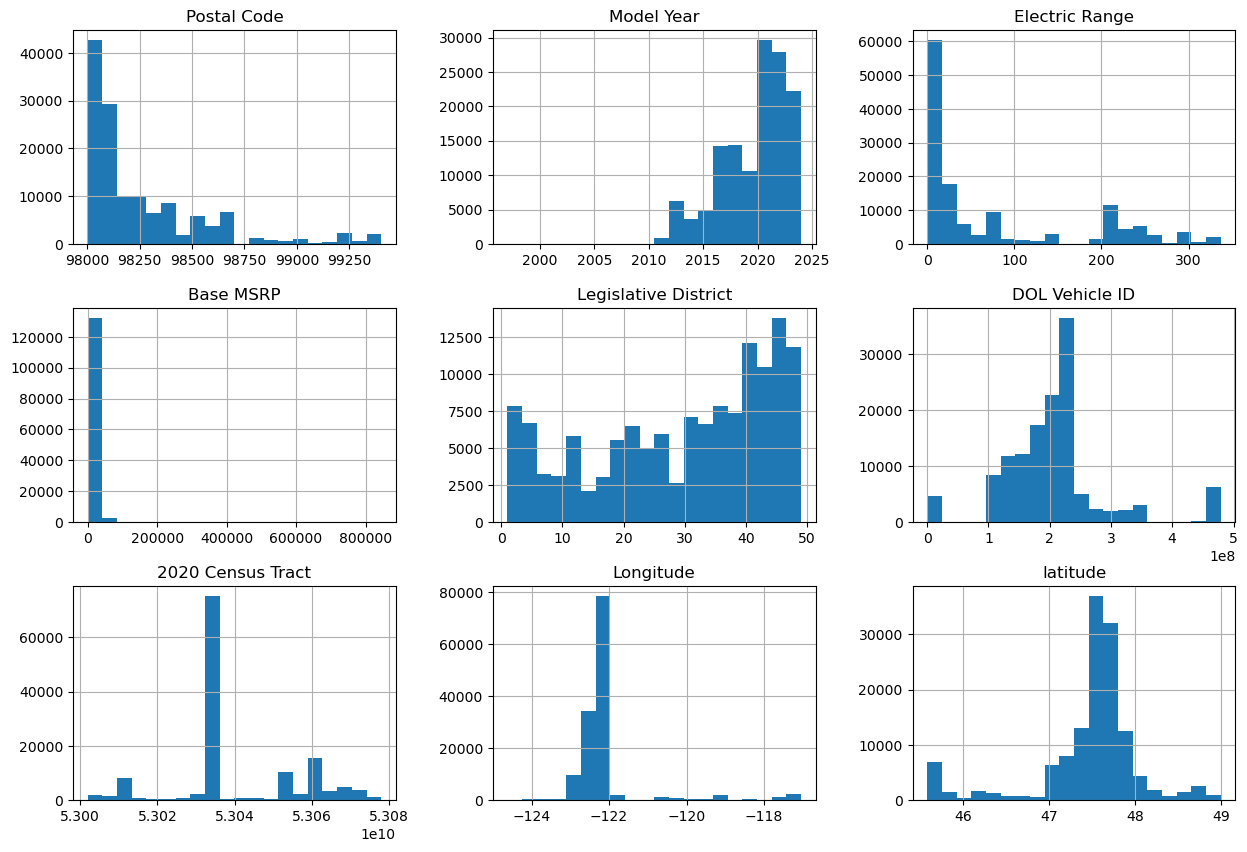

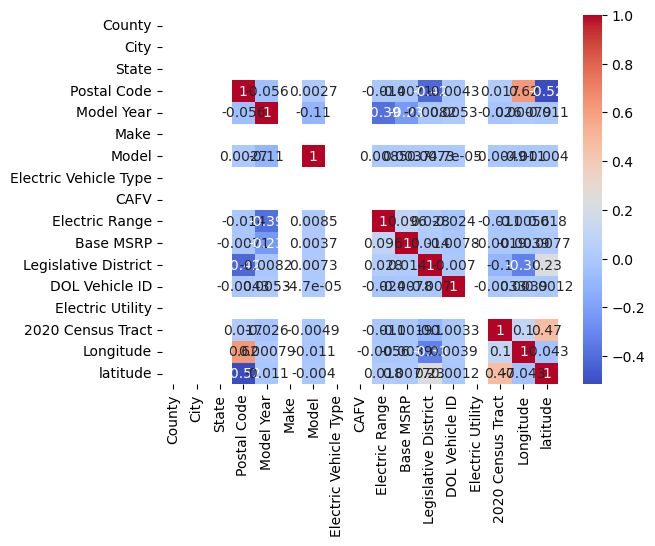

In [10]:
# Используем библиотеки для визуализации
import seaborn as sns
import matplotlib.pyplot as plt

# Основные статистики
df.describe()

# Гистограммы для числовых признаков
df.hist(bins=20, figsize=(15,10))
plt.show()

# Проверка, что все столбцы содержат числовые значения
df = df.apply(pd.to_numeric, errors='coerce')

# Заполнение пропущенных значений, если они появились
df.fillna(0, inplace=True)

# Теперь можно строить матрицу корреляции
corr_matrix = df.corr()

# Отображение
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


Шаг 3: Параметры визуализации данных
Box plot для выявления выбросов.

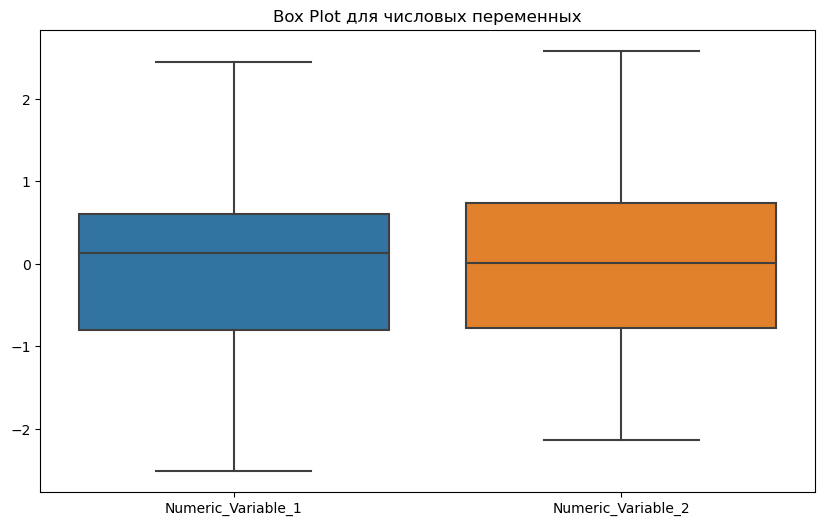

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Пример данных
# Замените этот блок кода на реальные данные из вашего датафрейма
import pandas as pd
import numpy as np

data = {'Numeric_Variable_1': np.random.randn(100),
        'Numeric_Variable_2': np.random.randn(100),
        'Category_Variable': np.random.choice(['A', 'B', 'C'], size=100)}

df = pd.DataFrame(data)

# Box Plot для выявления выбросов
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Numeric_Variable_1', 'Numeric_Variable_2']])
plt.title('Box Plot для числовых переменных')
plt.show()

Pair plot для визуализации зависимостей между разными переменными.

C:\Users\Aidyn\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

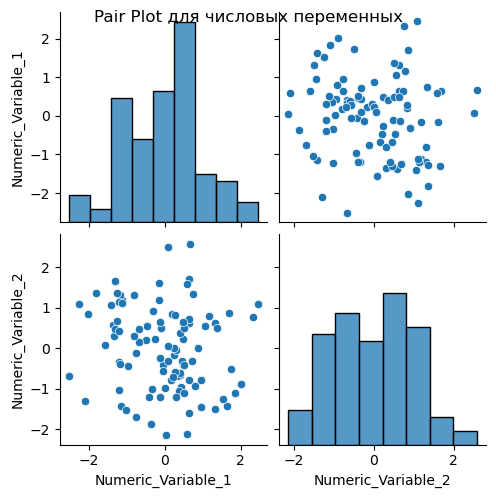

In [12]:
plt.figure(figsize=(12, 8))
sns.pairplot(df[['Numeric_Variable_1', 'Numeric_Variable_2']])
plt.suptitle('Pair Plot для числовых переменных')
plt.show()

Круговая диаграмма для категориальной переменной

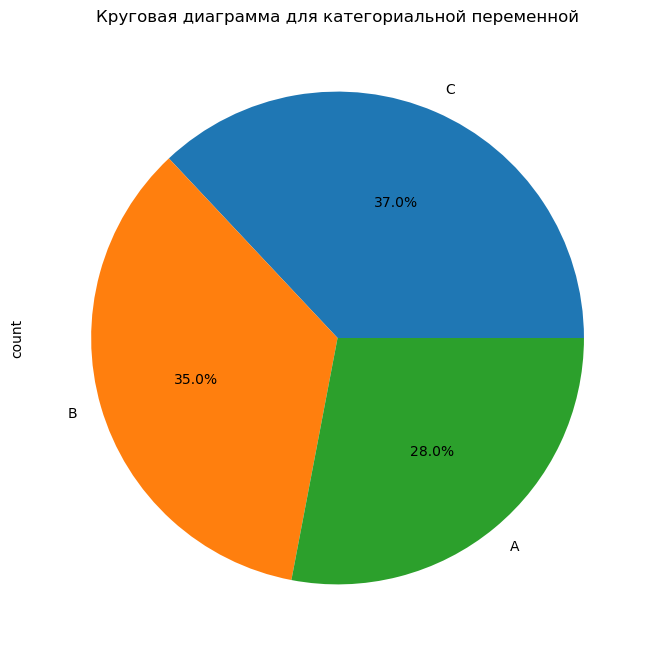

In [13]:
plt.figure(figsize=(8, 8))
df['Category_Variable'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Круговая диаграмма для категориальной переменной')
plt.show()

Шаг 5: Регрессия

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv('C:/Users/Aidyn/Desktop/repos/us_car_data.csv')

target_variable = 'Electric Range'
features = ['Model Year', 'Base MSRP']

In [20]:
data = df[features + [target_variable]]

In [21]:
data = data.dropna()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target_variable], test_size=0.2, random_state=42)

In [23]:
model = LinearRegression()

In [24]:
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)

In [26]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 8205.66314910678


In [27]:
df = pd.read_csv("us_car_data.csv", low_memory=False)
df

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,CAFV,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Longitude,latitude
0,Thurston,Tumwater,WA,98512,2019,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,220,0,22,242565116,PUGET SOUND ENERGY INC,53067010910,-122.913102,47.013593
1,Island,Clinton,WA,98236,2022,NISSAN,LEAF,Battery Electric Vehicle,Eligibility unknown as battery range has not b...,0,0,10,183272785,PUGET SOUND ENERGY INC,53029972000,-122.359364,47.979655
2,Snohomish,Snohomish,WA,98290,2020,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,266,0,44,112552366,PUGET SOUND ENERGY INC,53061052502,-122.091505,47.915555
3,King,Seattle,WA,98134,2020,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,322,0,11,6336319,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033009300,-122.329815,47.579810
4,Snohomish,Edmonds,WA,98020,2013,TESLA,MODEL S,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,208,69900,21,186212960,PUGET SOUND ENERGY INC,53061050403,-122.375070,47.808070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134469,King,Yarrow Point,WA,98004,2020,TESLA,MODEL S,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,330,0,48,124776627,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033024100,-122.201905,47.613850
134470,King,Burien,WA,98168,2021,TESLA,MODEL Y,Battery Electric Vehicle,Eligibility unknown as battery range has not b...,0,0,33,142857676,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033027100,-122.286460,47.476130
134471,Pierce,Gig Harbor,WA,98335,2022,TESLA,MODEL S,Battery Electric Vehicle,Eligibility unknown as battery range has not b...,0,0,26,220157724,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,53053072407,-122.583545,47.323449
134472,Grant,Ephrata,WA,98823,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle,Eligibility unknown as battery range has not b...,0,0,13,223872596,PUD NO 2 OF GRANT COUNTY,53025010402,-119.555130,47.319360


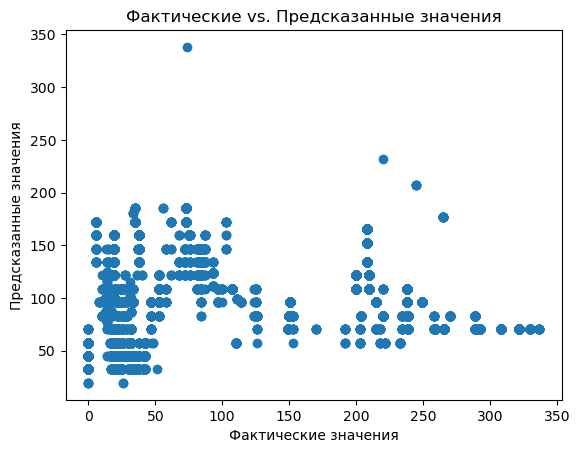

In [28]:
plt.scatter(y_test, y_pred)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Фактические vs. Предсказанные значения')
plt.show()

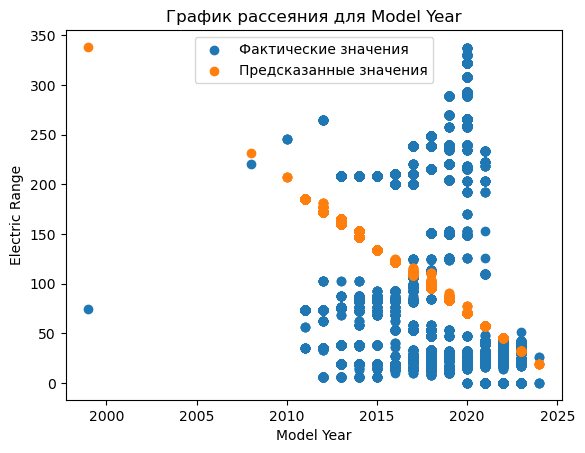

In [29]:
plt.scatter(X_test['Model Year'], y_test, label='Фактические значения')
plt.scatter(X_test['Model Year'], y_pred, label='Предсказанные значения')
plt.xlabel('Model Year')
plt.ylabel('Electric Range')
plt.title('График рассеяния для Model Year')
plt.legend()
plt.show()